In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import os

path = os.listdir(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\train\\')
classes = {'no_tumor':0, 'pituitary_tumor':1}


In [5]:
pip install opencv-python


Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'C:\Users\Abhindas\Downloads\Datasets\braintumor\train\\'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [7]:
X = np.array(X)
Y = np.array(Y)

In [8]:
print(np.unique(Y))

[0 1]


In [9]:
import os

path = r'C:\Users\Abhindas\Downloads\Datasets\braintumor\train'
for cls in classes:
    pth = os.path.join(path, cls)
    print(f"Number of images in {cls} class: {len(os.listdir(pth))}")


Number of images in no_tumor class: 395
Number of images in pituitary_tumor class: 827


In [10]:
print(pd.Series(Y).value_counts())

1    827
0    395
dtype: int64


In [11]:
X.shape

(1222, 200, 200)

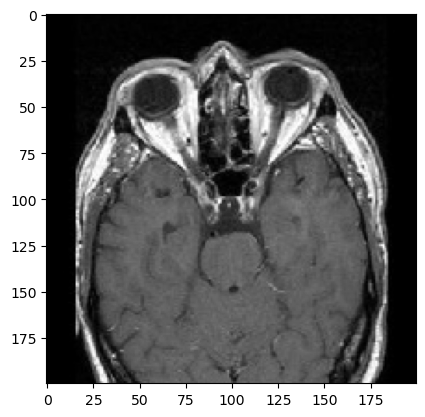

In [12]:
plt.imshow(X[0], cmap='gray')


In [13]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [15]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [16]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [17]:
from sklearn.decomposition import PCA

In [18]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [20]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [21]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

In [22]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9591836734693877


In [23]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


In [24]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [25]:
pred[36]

0

In [26]:
ytest[36]

1

In [27]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

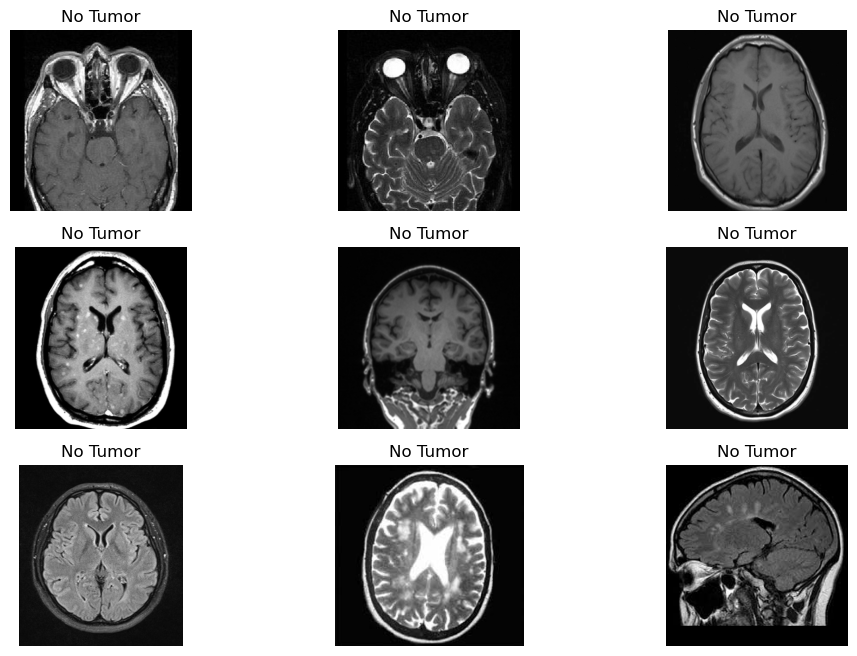

In [31]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\test\no_tumor\\')
c=1
for i in os.listdir(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\test\no_tumor\\')[:9]:
    plt.subplot(3,3,c)
    
    img = cv2.imread(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\test\no_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1


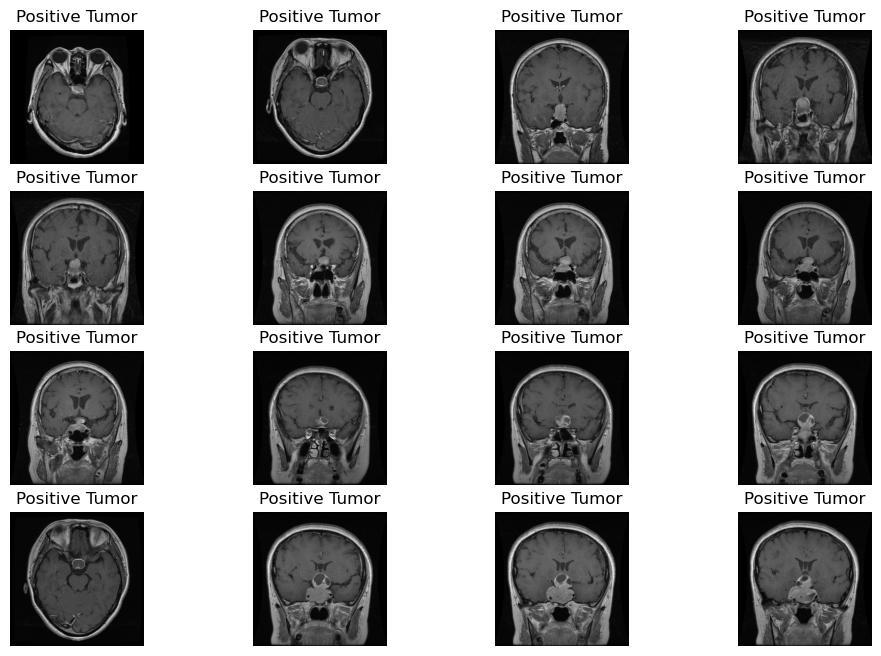

In [30]:
plt.figure(figsize=(12,8))
p = os.listdir(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\test\pituitary_tumor\\')
c=1
for i in os.listdir(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\test\pituitary_tumor\\')[:16]:
    plt.subplot(4,4,c)
    
    img = cv2.imread(r'C:\Users\Abhindas\Downloads\Datasets\braintumor\test\pituitary_tumor\\'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1